## ASSIGNMENT 12 Exploratory Data Analysis 2 (EDA2)

#### 1. Data Exploration and Preprocessing:
**•	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).**

In [3]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"F:\Data science Course by ExcelR\ASSIGNMENTS\12. EDA2\adult_with_headers.csv")
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

We have over 30k rows and 15 columns

In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

These are the names of the columns.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


* We have around 15 features among which 6 are int64, and remaining 9 are object

In [11]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


* looking at this we can see that our dataset has a lot of outliers
* it also definately needs to be scaled
* fnlwgt column seems to be of no particular use for this example

**•	Handle missing values as per the best practices (imputation, removal, etc.)**

In [14]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

* it appears to be all columns have no null values but not quite
* This dataset has null values in the form of ' ?' so we need to replace those with NaN to get proper view of how many null values we do have in this dataset
* We can see an example of that in below code.

In [16]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [17]:
df = df.replace({' ?':np.NaN})

In [18]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

* Now we are seeing the proper number of null values in each column
* From above we can infer that we cannot know for sure what workclass we can assign to anyone so we'll be dropping those rows.
* Similarly there is no way to know occupation of people so we'll be removing those rows as well
* It is also difficult to guess the native_country of a person based on the other provided data, so we'll be removing those as well

In [20]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(32561, 15)
(30162, 15)


In [21]:
df.isnull().sum().sum()

0

All Null values has been handled

**•	Apply scaling techniques to numerical features:**

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

**Applying Standard Scaling**

In [26]:
# let's separate numerical and object columns names
obj_cols = (df.dtypes == 'object')
obj_cols = (obj_cols[obj_cols] == True).index
print("Obejct Columns are: ")
print(obj_cols)
num_cols = (df.dtypes != 'object')
num_cols = (num_cols[num_cols] == True).index
print("Numerical Columns are: ")
print(num_cols)

Obejct Columns are: 
Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')
Numerical Columns are: 
Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


In [27]:
#Let's work with numerical columns
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()                                       #calling standard scaler
x_std_scaled = std_scaler.fit_transform(df[list(num_cols)])         #fit and transform the numerical columns and store it in differnt variable
x_std_scaled

array([[ 0.04279571, -1.0627216 ,  1.12891838,  0.14609228, -0.21858598,
        -0.07773411],
       [ 0.88028814, -1.00787131,  1.12891838, -0.14744462, -0.21858598,
        -2.3315307 ],
       [-0.03333996,  0.24469349, -0.4397382 , -0.14744462, -0.21858598,
        -0.07773411],
       ...,
       [ 1.48937355, -0.3585745 , -0.4397382 , -0.14744462, -0.21858598,
        -0.07773411],
       [-1.25151078,  0.11070545, -0.4397382 , -0.14744462, -0.21858598,
        -1.74721307],
       [ 1.0325595 ,  0.92884082, -0.4397382 ,  1.88111954, -0.21858598,
        -0.07773411]])

Above is the scaled numeric columns using StandardScaler.

In [29]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()                                  #call the MinMaxScaler
x_mm_scaled = mm_scaler.fit_transform(df[list(num_cols)])   #fit and transform the numerical columns and store it in different variable
x_mm_scaled

array([[0.30136986, 0.04333771, 0.8       , 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.04727738, 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.1372439 , 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.09391367, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.1276201 , 0.53333333, 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.18638336, 0.53333333, 0.1502415 , 0.        ,
        0.39795918]])

Above is the numeric scaled columns using MinMaxScaler

**•	Discuss the scenarios where each scaling technique is preferred and why.**

##### **StandardScaler:** is a scaling techinique used when we want the columns to have mean of 0 and standard deiation of max 1 value.
* It assumes the data follows distribution similar to gaussian distribution for optimal performance
* It also depends on algorithms that we have to implement for using Standard Scaler
* Algorithms like Linear and Logistoc Regression, SVM, Lasso and Ridge, PCA, KMeans and hierarical clustering.
* All the above algorithm performs better if the data is scaled using StandardScaler
* Any data distributed in a gaussian like manner, it is better to use Standard Scaler

##### **MinMaxScaler:** is a scaling techinique used when we want the columns to have fixed range of 0 to 1.
* It is very helpful for the columns having lot of outliers
* It preserves the shape of the distribution of data, it dosen't standardize rather mearily reduces the scale from 0 to 1
* There are also few algorithms that prefer MinMaxScaled data rather than StandardScaled data.
* Gardient based algorithms like CNN, RNN, KMeans Clustering
* The reason why we use MinMaxScaler for these algorithms is because these algorithms rely on distances, and scaling to a fixed range ensures that all features contribute equally.

#### 2. Encoding Techniques:

In [34]:
# Let's work with the categorical columns and see each columns have how many unique values
for col in obj_cols:
    print(f'* "{col}" has "{len(df[col].unique())}" unique values')

* "workclass" has "7" unique values
* "education" has "16" unique values
* "marital_status" has "7" unique values
* "occupation" has "14" unique values
* "relationship" has "6" unique values
* "race" has "5" unique values
* "sex" has "2" unique values
* "native_country" has "41" unique values
* "income" has "2" unique values


* We have a total of 9 columns which are categorical:
* We will be using OneHotEncoding for ['race', 'sex', 'income']
* We will be using LabelEncoding for ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country']

**•	Apply One-Hot Encoding to categorical variables with less than 5 categories.**

In [37]:
from sklearn.preprocessing import OneHotEncoder

encoded_df = df                                    #assigning a new variable to preserve the original df 
encoder = OneHotEncoder(sparse_output=False)                          #disable sparse_output to get dense output
encoded_arr = encoder.fit_transform(df[['race', 'sex', 'income']])    #encode the three columns
encoded_df = pd.DataFrame(encoded_arr, columns = encoder.get_feature_names_out(['race', 'sex', 'income']))      #getting the names of the feature and convert the dense matirx to DataFrame
encoded_df

,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
30157,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
30158,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
30159,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
30160,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


This is how the column looks like after using One Hot Encoding, for each unique value in the column it creates a new feature and assign it as True or False depending on the presence of that data point.

**•	Use Label Encoding for categorical variables with more than 5 categories.**

In [40]:
from sklearn.preprocessing import LabelEncoder
converted_cols = pd.DataFrame()
for col in ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country']:
    le = LabelEncoder()
    converted_cols[col] = le.fit_transform(df[col])
converted_cols

,workclass,education,marital_status,occupation,relationship,native_country
0,5,9,4,0,1,38
1,4,9,2,3,0,38
2,2,11,0,5,1,38
3,2,1,2,5,0,38
4,2,9,2,9,5,4
...,...,...,...,...,...,...
30157,2,7,2,12,5,38
30158,2,11,2,6,0,38
30159,2,11,6,0,4,38
30160,2,11,4,0,3,38


This is how the LabelEncoded columns look like each column's unique values are assigned some random number and all the datapoints are converted to that number and similarly all other data points are converted.

**•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.**

* **One-Hot Encoding Pros**
1. Treats categories as independent meaning each category is given equal importance, better for nominal data(data which is unordered)
2. Models like LR and NN performs better with this since they don't assume any ordinal relationship.
3. It has Clear representation of categories and their presence or absence implying great interpretability.

* **One-Hot Encoding Cons**
1. For a feature with many unique categories, it produces many columns, memory is consumed a lot.
2. The produced matrix is a sparse, it may be inefficient for processing if it has a large number of columns.
3. For a large number of category combination it may overfit

* **Label Encoding Pros**
1. Very simple to implement
2. Uses only single column, best for columns with many number of unique values
3. Best suitable for Tree-Based Models like DT, RF and XGB

* **Label Encoding Cons**
1. Has implicit ordinal relationship between categories, which may mislead the models like LR or SVM since they are very sensitive to numbers.
2. For columns with many number of unique values interpretability becomes difficult.
3. Models like KNN or KMeans may treat higher number as more important, leading to unrequired bias.

#### 3. Feature Engineering:

**•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.**

In [47]:
df['net_capital'] = df['capital_gain'] - df['capital_loss']
df['net_capital']

0         2174
1            0
2            0
3            0
4            0
         ...  
32556        0
32557        0
32558        0
32559        0
32560    15024
Name: net_capital, Length: 30162, dtype: int64

This new features gives us net capital which can be one of the important feature to determing the range of income of a person.

In [49]:
#lets explore unique values and their count of workclass
df['workclass'].value_counts()

workclass
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: count, dtype: int64

If we observe above unique values and their count we have few types which seems redundant for example Self-emp-not-inc and Self-emp-inc still means self-employed, similarly Local-gov, State-gov, Federal-gov all means gov-job so let's encode this.

In [51]:
df['workclass_group'] = df['workclass'].map({' Private':'Private',
                                                ' Self-emp-not-inc':'Self-emp',
                                                ' Self-emp-inc':'Self-emp',
                                                ' Local-gov':'Gov-job',
                                                ' State-gov':'Gov-job',
                                                ' Federal-gov':'Gov-job',
                                                ' Without-pay':'Others'})

In [52]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,net_capital,workclass_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,2174,Gov-job
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,Self-emp
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,Private
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,Private
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,Private


* We can see the new features have been added at the end of the df working as new features.
* Similarly we can explore many other features are create new ones from them.
* for another quick example take martial_status there are quite a few number of types but they mean the same thing just like "Divorced, Separated" they both mean now they are 'single'.

**•	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.**

In [55]:
# Let's find the skeweness of all the numerical columns
from scipy.stats import skew
for col in num_cols:
    print(f'"{col}" has skeweness score of {df[col].skew()}')    

"age" has skeweness score of 0.5302277818340089
"fnlwgt" has skeweness score of 1.4592196557733803
"education_num" has skeweness score of -0.30537865469615494
"capital_gain" has skeweness score of 11.902681717422217
"capital_loss" has skeweness score of 4.526379640496805
"hours_per_week" has skeweness score of 0.33086930440342444


* We can see almost all of the columns are positively skewed and only "education_num" is negatively skewed.
* We also observe here that "capital_gain" is the column which is highly skewed with the skewness of over 11.9
* So we'll be applying log transformation to "capital_gain" and "capital_loss"

C:\Users\peros\AppData\Local\Temp\ipykernel_10328\1853247655.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['capital_gain'])


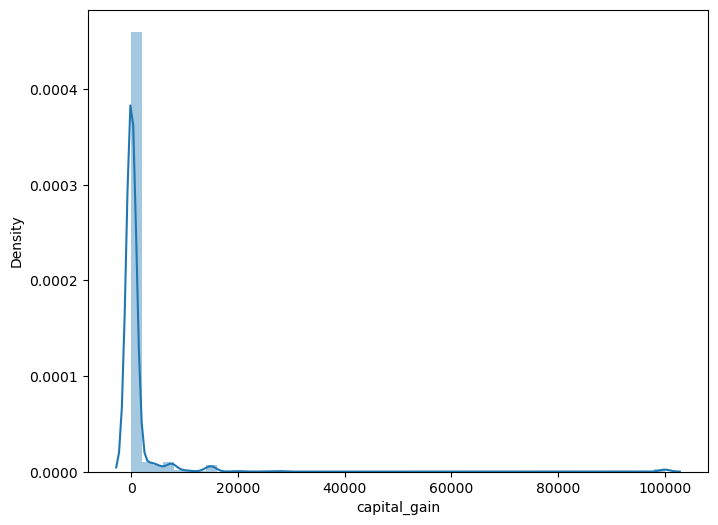

In [57]:
# Let's see these 2 columns more closely with a distplot
plt.figure(figsize = (8,6))
sns.distplot(df['capital_gain'])
plt.show()

* We can confirm here that the columns are higly skewed.

In [59]:
df['capital_gain_log'] = np.log1p(df['capital_gain'])

In [60]:
df[['capital_gain_log']].head()

,capital_gain_log
0,7.684784
1,0.000000
2,0.000000
3,0.000000
4,0.000000


In [61]:
print(f'"capital_gain_log" has skeweness score of {df['capital_gain_log'].skew()}')  

"capital_gain_log" has skeweness score of 3.0732075546757534


C:\Users\peros\AppData\Local\Temp\ipykernel_10328\3911523004.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['capital_gain_log'])


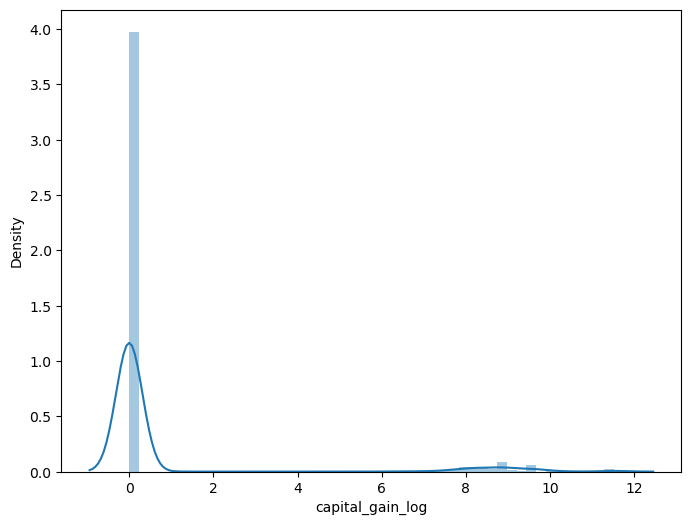

In [62]:
# Let's see in the form of a distplot

plt.figure(figsize = (8,6))
sns.distplot(df['capital_gain_log'])
plt.show()

#### 4. Feature Selection:

In [64]:
#selecting numerical columns to find any outliers

X = df[['age','education_num','capital_gain','capital_loss','hours_per_week','net_capital','capital_gain_log']]

**•	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.**

In [66]:
from sklearn.ensemble import IsolationForest      #import isolationfores

iso = IsolationForest()                           #call isolation forest
df['outlier_flag']=iso.fit_predict(X)             #fit and predict it with the numerical feature and save it in a column indicating if it is an outlier or not
df['outlier_flag'].sample(5)                      #checking few samples of the column

4239     1
18076   -1
6793    -1
12583   -1
5257     1
Name: outlier_flag, dtype: int32

In [67]:
df['outlier_flag'].value_counts()            #finding the total number of outliers in our numerical columns

outlier_flag
 1    25735
-1     4427
Name: count, dtype: int64

* Here -1 indicates an outlier
* And 1 indicates not an outlier 

In [69]:
# Let's remove the outliers
cleaned_df = df[df['outlier_flag'] == 1]               # selecting all the columns that are not an outlier
cleaned_df = cleaned_df.drop('outlier_flag', axis=1)   #dropping the outlier_flag column since its work is done and no longer of any use
cleaned_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,net_capital,workclass_group,capital_gain_log
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,Self-emp,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,Private,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,Private,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,Private,0.0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0,Private,0.0


Discussion on how outliers may affect model's performance
* Outliers do effect models like LR, MLR, Logistic Regression and many others to be biased towards incurring coefficients and inaccurate predictions.
* As we discussed earlier when we use LabelEncoder on column having high Ordinal the algorith may be a bit biased towards higher numbers similarly outliers may have higher number than usual and may lead to bias in our model hence increasing inaccuracy of the model.
* Outliers affect algorithms like KNN or Clustering methods since they are very sensitive towards distance may cause instability.
* The model will definitely overfit if it treats an outlier as a valid datapoint
* Benefits of removing outliers are reduces noise, let's model to focus on core datapoints, increases model accuracy, creates more reliable model
* There are a few instances where we shouldn't be removing outliers when that outlier reveals an important situation (for example suddent increase in heart-rate may reveal that the person may get a heart attack)

In [71]:
# !pip install ppscore                       #if required

In [131]:
cleaned_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,net_capital,workclass_group,capital_gain_log
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,Self-emp,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,Private,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,Private,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,Private,0.0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0,Private,0.0


**•	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.**

In [133]:
import ppscore as pps                            # import ppscore

pps_score = pps.matrix(cleaned_df[['age','education_num','capital_gain','capital_loss','hours_per_week']])           # 
pps_score                                        # 

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.0000,1.000000,None
1,age,education_num,0.000000,regression,True,mean absolute error,1.7590,1.779548,DecisionTreeRegressor()
2,age,capital_gain,0.000000,regression,True,mean absolute error,1.0012,1.986001,DecisionTreeRegressor()
3,age,capital_loss,0.000000,regression,True,mean absolute error,0.7386,1.457881,DecisionTreeRegressor()
4,age,hours_per_week,0.000000,regression,True,mean absolute error,6.7674,7.226026,DecisionTreeRegressor()
5,education_num,age,0.016562,regression,True,mean absolute error,10.1876,10.018873,DecisionTreeRegressor()
6,education_num,education_num,1.000000,predict_itself,True,None,0.0000,1.000000,None
7,education_num,capital_gain,0.000000,regression,True,mean absolute error,1.0012,1.994630,DecisionTreeRegressor()
8,education_num,capital_loss,0.000000,regression,True,mean absolute error,0.7386,1.466482,DecisionTreeRegressor()
9,education_num,hours_per_week,0.000000,regression,True,mean absolute error,6.7674,7.256749,DecisionTreeRegressor()


In [145]:
print(pps_score[['x', 'y', 'ppscore']].sort_values(by='ppscore', ascending=False))

                 x               y   ppscore
0              age             age  1.000000
6    education_num   education_num  1.000000
18    capital_loss    capital_loss  1.000000
12    capital_gain    capital_gain  1.000000
24  hours_per_week  hours_per_week  1.000000
20  hours_per_week             age  0.022863
5    education_num             age  0.016562
15    capital_loss             age  0.000000
23  hours_per_week    capital_loss  0.000000
22  hours_per_week    capital_gain  0.000000
21  hours_per_week   education_num  0.000000
19    capital_loss  hours_per_week  0.000000
2              age    capital_gain  0.000000
17    capital_loss    capital_gain  0.000000
16    capital_loss   education_num  0.000000
4              age  hours_per_week  0.000000
13    capital_gain    capital_loss  0.000000
1              age   education_num  0.000000
11    capital_gain   education_num  0.000000
10    capital_gain             age  0.000000
9    education_num  hours_per_week  0.000000
8    educa

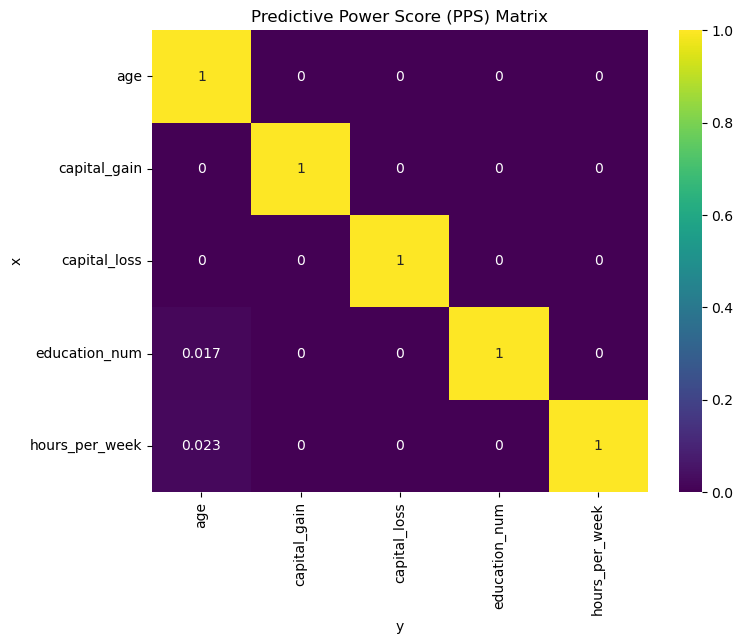

In [163]:
# Pivot the PPS matrix for a heatmap
pps_heatmap = pps_score.pivot(index='x', columns='y', values='ppscore')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pps_heatmap, cmap='viridis', annot=True)
plt.title('Predictive Power Score (PPS) Matrix')
plt.show()

* Based on PPScore none of the columns are highly correlated.

In [172]:
#Let's Find correlation
z = cleaned_df[['age','education_num','capital_gain','capital_loss','hours_per_week']].corr()
z

,age,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,4.201031e-02,-9.200932e-03,0.014528,0.151948
education_num,0.042010,1.000000e+00,7.824586e-07,0.008589,0.124834
capital_gain,-0.009201,7.824586e-07,1.000000e+00,-0.001087,-0.004048
capital_loss,0.014528,8.589015e-03,-1.086741e-03,1.000000,0.000442
hours_per_week,0.151948,1.248337e-01,-4.048292e-03,0.000442,1.000000


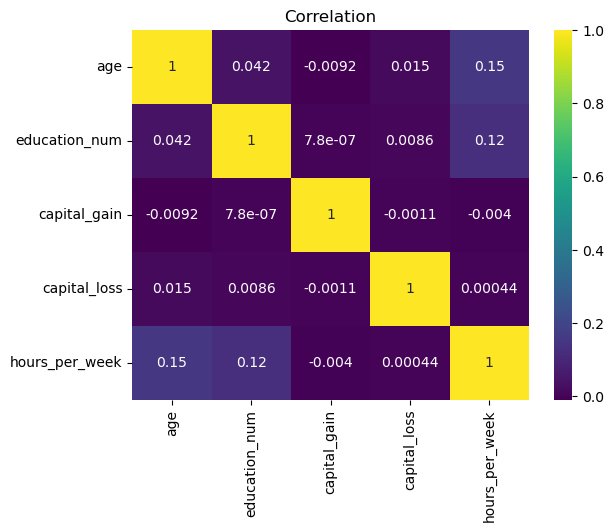

In [180]:
# Let's plot Heatmap of correlation of the numerical columns
sns.heatmap(z, cmap='viridis', annot=True)
plt.title('Correlation')
plt.show()

* looking at this we can say the correlation values are almost the same

Let's discuss the differences between PPS and correlation Matrix

PPS (Predictive Power Score):

* Measures the predictive power between pairs of variables.
* Takes into account both linear and non-linear relationships.
* Can handle categorical variables and can be used to predict both categorical and continuous variables.
* Provides a better view of how much one feature can help predict another, regardless of the type of relationship (non-linear, interactions, etc.).

Correlation Matrix:

* Measures linear relationships between numerical variables.
* The correlation coefficient (Pearson's r) ranges from -1 to 1, where 1 means a perfect positive linear relationship, and -1 means a perfect negative linear relationship.
* It cannot capture non-linear relationships, categorical variables, or interactions.